## import Librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Create synthetic dataframe

In [2]:
data = {
    'Employee_ID': range(1, 16),
    'Age': [22, 25, 28, 23, 24, 27, 30, 26, 30, 25, 29, 40, 31, 24, 27],
    'Salary': [30000, 35000, 32000, 40000, 38000, 42000, 50000, 36000, 39000, 41000, 37000, 38500, 36000, 40000, 55000],
    'Experience': [1, 3, 2, 4, 3, 5, 3, 3, 4, 5, 3, 6, 30, 4, 35],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR', 'Finance', 'IT', 'HR', 'Finance', 'IT', 'HR', 'Finance', 'IT', 'HR', 'Finance']
}

df = pd.DataFrame(data)
df

,Employee_ID,Age,Salary,Experience,Department
0,1,22,30000,1,HR
1,2,25,35000,3,IT
2,3,28,32000,2,Finance
3,4,23,40000,4,IT
4,5,24,38000,3,HR
5,6,27,42000,5,Finance
6,7,30,50000,3,IT
7,8,26,36000,3,HR
8,9,30,39000,4,Finance
9,10,25,41000,5,IT


In [3]:
df.describe()

,Employee_ID,Age,Salary,Experience
count,15.000000,15.00000,15.000000,15.000000
mean,8.000000,27.40000,39300.000000,7.400000
std,4.472136,4.42073,6323.990603,10.308111
min,1.000000,22.00000,30000.000000,1.000000
25%,4.500000,24.50000,36000.000000,3.000000
50%,8.000000,27.00000,38500.000000,4.000000
75%,11.500000,29.50000,40500.000000,5.000000
max,15.000000,40.00000,55000.000000,35.000000


# Detect Outliers:
- <h4> Visualization-Based Methods </h4>
- <h4> Statistical Methods </h4>
- <h4> Conditional Methods </h4>

## 1. Visualization-Based Method
<h4> i. Boxplot </h4>
<h4> ii. Scatter Plot</h4>
<h4> iii. Histogram </h4>


## i. Boxplot

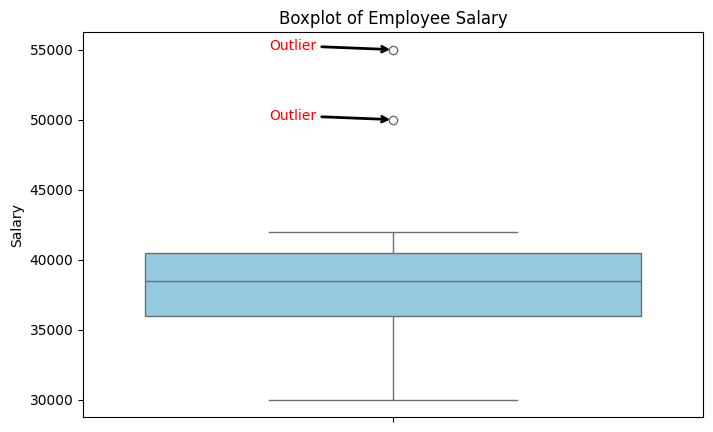

In [4]:
plt.figure(figsize=(8,5))
sns.boxplot(y=df['Salary'], color='skyblue')
plt.title("Boxplot of Employee Salary")
plt.ylabel("Salary")



x_pos = 0
outlier_y = [50000, 55000]
for y in outlier_y:
    plt.annotate('Outlier', xy=(x_pos, y), xytext=(x_pos-0.2, y),
                 arrowprops=dict(facecolor='red', arrowstyle='->', lw=2),
                 color='red', fontsize=10)


plt.show()


## ii. Scatter Plot

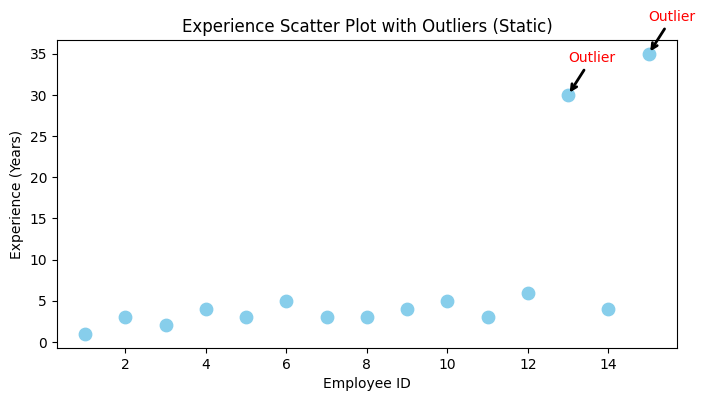

In [5]:
plt.figure(figsize=(8,4))
plt.scatter(df['Employee_ID'], df['Experience'], color='skyblue', s=80)

plt.title("Experience Scatter Plot with Outliers (Static)")
plt.xlabel("Employee ID")
plt.ylabel("Experience (Years)")



outlier_points = [(15, 35), (13, 30)]
for x, y in outlier_points:
    plt.annotate('Outlier', xy=(x, y), xytext=(x, y+4),
                 arrowprops=dict(facecolor='red', arrowstyle='->', lw=2),
                 color='red', fontsize=10)

plt.show()

## iii. Histogram

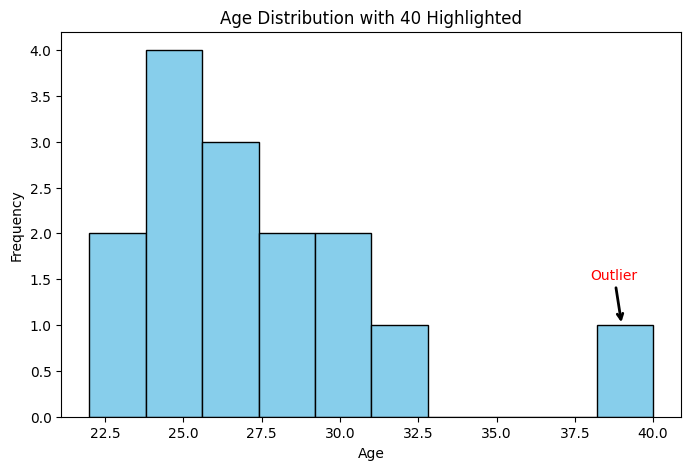

In [6]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Age Distribution with 40 Highlighted")
plt.xlabel("Age")
plt.ylabel("Frequency")



plt.annotate('Outlier', xy=(39, 1), xytext=(38, 1.5),
             arrowprops=dict(facecolor='red', arrowstyle='->', lw=2),
             color='red', fontsize=10)

plt.show()

## 2. Statistical Methods

### i. Z-Score

In [7]:
xbar = df['Experience'].mean()
sigma = df['Experience'].std()

df['Z_score'] = (df['Experience'] - xbar) / sigma
out_exp = df[np.abs(df['Z_score']) > 2]
print(out_exp['Experience'])

12    30
14    35
Name: Experience, dtype: int64


### ii. IQR(Interquartile Range)

In [8]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

out_age = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(out_age['Age'])

11    40
Name: Age, dtype: int64


## 3. Conditional Method

In [9]:
out_cnd = df[df['Salary'] >= 50000]
out_cnd['Salary']

6     50000
14    55000
Name: Salary, dtype: int64

# Handling Outliers:
- i. Remove
- ii. Replace

## i. Drop

In [10]:
df = df.drop(out_age.index)
df

,Employee_ID,Age,Salary,Experience,Department,Z_score
0,1,22,30000,1,HR,-0.620870
1,2,25,35000,3,IT,-0.426848
2,3,28,32000,2,Finance,-0.523859
3,4,23,40000,4,IT,-0.329837
4,5,24,38000,3,HR,-0.426848
5,6,27,42000,5,Finance,-0.232826
6,7,30,50000,3,IT,-0.426848
7,8,26,36000,3,HR,-0.426848
8,9,30,39000,4,Finance,-0.329837
9,10,25,41000,5,IT,-0.232826


## Replace

In [11]:
df['Salary'] = df['Salary'].astype(float)
df.loc[out_cnd.index, 'Salary'] = df[df['Salary'] < 50000]['Salary'].mean()
df

,Employee_ID,Age,Salary,Experience,Department,Z_score
0,1,22,30000.000000,1,HR,-0.620870
1,2,25,35000.000000,3,IT,-0.426848
2,3,28,32000.000000,2,Finance,-0.523859
3,4,23,40000.000000,4,IT,-0.329837
4,5,24,38000.000000,3,HR,-0.426848
5,6,27,42000.000000,5,Finance,-0.232826
6,7,30,37166.666667,3,IT,-0.426848
7,8,26,36000.000000,3,HR,-0.426848
8,9,30,39000.000000,4,Finance,-0.329837
9,10,25,41000.000000,5,IT,-0.232826


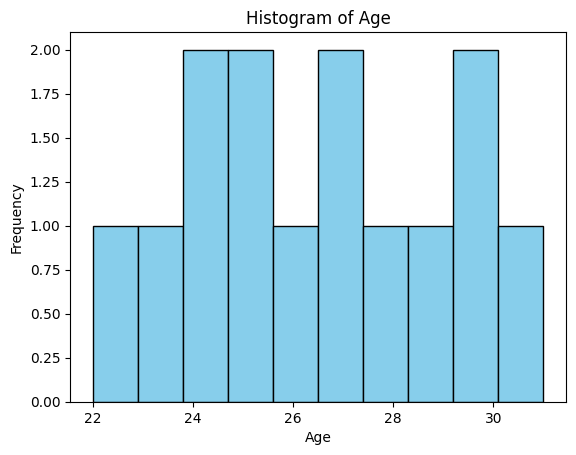

In [12]:
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()